In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from sklearn import datasets, linear_model
%matplotlib inline

In [57]:
# Import sensor data indexed by Timestamp
sensor_df = pd.read_csv('HHtest.txt', names = ["Sensor", "Seconds", "Timestamp", "Temp", "Rel Humid", "Voltage"], index_col = ['Timestamp'], parse_dates = ["Timestamp"])
# Delete unneeded columns
sensor_df.drop(['Sensor','Seconds','Voltage'], axis = 1, inplace = True)
sensor_df[:3]

,Temp,Rel Humid
Timestamp,,
2016-07-07 14:59:53,75.20,60.0
2016-07-07 15:15:42,78.26,57.1
2016-07-07 15:31:30,76.82,44.5


In [58]:
#sensor_df.set_index(['Timestamp'], drop = False, inplace = True)
#sensor_df[:3]

In [59]:
# Resample for every 30 minutes and name according to midpoint
sensor_df = sensor_df.resample('30T', loffset = '-15 min').mean()
sensor_df.head

<bound method DataFrame.head of                       Temp  Rel Humid
Timestamp                            
2016-07-07 14:15:00  75.20      60.00
2016-07-07 14:45:00  78.26      57.10
2016-07-07 15:15:00  76.82      43.55
2016-07-07 15:45:00  76.01      45.05
2016-07-07 16:15:00  74.93      46.30
2016-07-07 16:45:00  74.12      49.05
2016-07-07 17:15:00  73.85      47.70
2016-07-07 17:45:00  73.58      48.25
2016-07-07 18:15:00  73.31      51.10
2016-07-07 18:45:00  73.22      50.80
2016-07-07 19:15:00  73.40      52.70
2016-07-07 19:45:00  73.04      51.20
2016-07-07 20:15:00  73.22      52.45
2016-07-07 20:45:00  72.95      53.85
2016-07-07 21:15:00  72.77      53.40
2016-07-07 21:45:00  72.86      54.15
2016-07-07 22:15:00  73.13      54.80
2016-07-07 22:45:00  72.59      53.70
2016-07-07 23:15:00  73.04      55.05
2016-07-07 23:45:00  72.86      55.40
2016-07-08 00:15:00  72.86      55.65
2016-07-08 00:45:00  72.86      55.70
2016-07-08 01:15:00  72.86      55.80
2016-07-08 01:45:0

In [61]:
# Import sensor data indexed by Timestamp
LGA_df = pd.read_csv('KLGA.csv', names = ["Timestamp", "Temp", "Rel Humid"], index_col = ['Timestamp'], parse_dates = ["Timestamp"])
#LGA_df = LGA_df.set_index(['Timestamp'])
LGA_df.head

<bound method DataFrame.head of                       Temp  Rel Humid
Timestamp                            
2016-07-01 02:00:00  75.22      60.98
2016-07-01 02:05:00  75.22      60.98
2016-07-01 02:10:00  75.22      60.98
2016-07-01 02:15:00  75.22      60.98
2016-07-01 02:20:00  75.22      60.98
2016-07-01 02:25:00  75.22      57.20
2016-07-01 02:30:00  75.22      57.20
2016-07-01 02:35:00  75.22      53.63
2016-07-01 02:40:00  75.22      53.63
2016-07-01 02:45:00  75.22      53.63
2016-07-01 02:50:00  75.22      53.63
2016-07-01 02:51:00  75.02      53.62
2016-07-01 02:55:00  75.22      53.63
2016-07-01 03:00:00  73.42      69.01
2016-07-01 03:05:00  73.42      69.01
2016-07-01 03:10:00  73.42      69.01
2016-07-01 03:15:00  73.42      69.01
2016-07-01 03:20:00  73.42      64.76
2016-07-01 03:25:00  73.42      64.76
2016-07-01 03:30:00  73.42      64.76
2016-07-01 03:35:00  73.42      64.76
2016-07-01 03:40:00  73.42      60.75
2016-07-01 03:45:00  73.42      60.75
2016-07-01 03:50:0

In [62]:
# Resample for every 30 minutes and name according to midpoint
LGA_df = LGA_df.resample('30T', loffset = '-15 min').mean()
LGA_df[:3]

,Temp,Rel Humid
Timestamp,,
2016-07-01 01:45:00,75.220000,60.350000
2016-07-01 02:15:00,75.191429,54.138571
2016-07-01 02:45:00,73.420000,67.593333


In [38]:
# Join df together for all timestamps that exist in both files
joined_df = LGA_df.join(sensor_df, how = 'inner', lsuffix = '_LGA', rsuffix = '_sensor')
joined_df = joined_df.dropna() # drop NaN values
joined_df

,Temp_LGA,Rel Humid_LGA,Temp_sensor,Rel Humid_sensor
Timestamp,,,,
2016-07-07 14:15:00,85.502857,67.405714,75.20,60.00
2016-07-07 14:45:00,83.920000,70.441667,78.26,57.10
2016-07-07 15:15:00,87.585714,59.391429,76.82,43.55
2016-07-07 15:45:00,85.420000,63.580000,76.01,45.05
2016-07-07 16:15:00,87.714286,56.904286,74.93,46.30
2016-07-07 16:45:00,86.920000,61.275000,74.12,49.05
2016-07-07 17:15:00,84.320000,66.630000,73.85,47.70
2016-07-07 17:45:00,83.920000,66.006667,73.58,48.25
2016-07-07 18:15:00,80.797143,72.445714,73.31,51.10


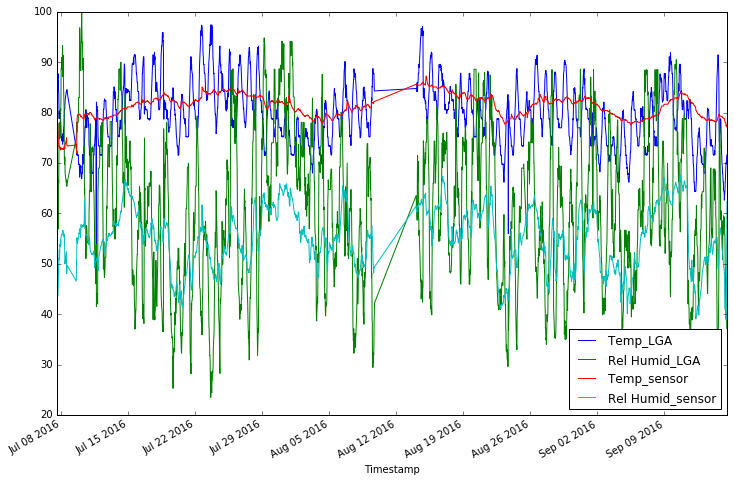

In [64]:
#Plot all data wrt time
fig_size = np.array(mpl.rcParams['figure.figsize']) # size of plot
fig_size *=2 # increase size of plot
joined_df.plot(figsize = fig_size) # plot data

In [44]:
# Linear regression between temp at LGA and temp from sensor (without time data) using linear_model from sklearn 
TempLGA = np.transpose(np.matrix(joined_df['Temp_LGA']))
Tempsensor = np.transpose(np.matrix(joined_df['Temp_sensor']))

regr = linear_model.LinearRegression()
regr.fit(TempLGA, Tempsensor)

#z = polyfit(TempLGA, Tempsensor, 4) # polyfit for fitting
#p = np.poly1d(z) #polynomial of fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
# Attempt multivariable linear regression
LGA_data = np.transpose(np.array([joined_df['Temp_LGA'], joined_df['Rel Humid_LGA'],]))
print (LGA_data.shape)
sensor_data = np.transpose(np.array([joined_df['Temp_sensor'], joined_df['Rel Humid_sensor'],]))
print (sensor_data.shape)

mult_regr = linear_model.LinearRegression()
mult_regr.fit(LGA_data, sensor_data)
mult_regr.params()
#mult_regr.predict(LGA_data[:20]).shape

(3063, 2)
(3063, 2)


(20, 2)

In [85]:
plt.plot()


(2, 3)

[]

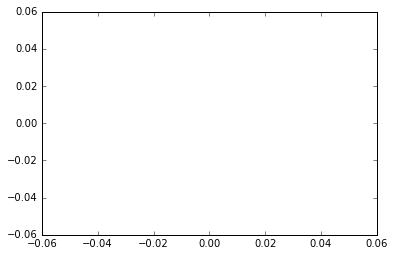

In [86]:
plt.plot()

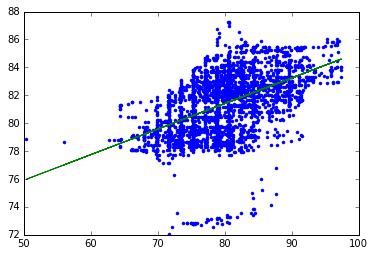

In [45]:
plt.plot(TempLGA, Tempsensor, '.', TempLGA, regr.predict(TempLGA))
#plt.plot(TempLGA, Tempsensor, '.', TempLGA, p(TempLGA), '--')


In [51]:
TempLGA_arr = np.array(joined_df['Temp_LGA'][:30])
Tempsensor_arr = np.array(joined_df['Temp_sensor'][:30])
pd.rolling_corr(TempLGA_arr, Tempsensor_arr, 10).plot()

/Users/Zelda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


Exception: Input arrays must be of the same type!